# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename,header=0)# YOUR CODE HERE

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set I chose is Book Review data set.
2. I will be predicting whether the review is positive or not. The label would be just the 'positive'.
3. It's a supervised learning problem, to be specific, it is a binary classification problem.
4. My only feature would be 'Review'.
5. This is an important problem because companies can process thousands or millions of reviews instantly, far faster than human reviewers could manage. This allows businesses to analyze their entire review corpus in real-time. Once developed, this models can analyze reviews at minimal ongoing cost compared to hiring human annotators to read and classify each review manually.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# Check the shape, columns of the data
# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

# Exam if the data contains null value
print("\nMissing Values:")
print(df.isnull().sum())

# inspect first 10 rows of dataframes
print("\nFirst 10 rows:")
print(df.head(10))

Dataset Shape: (1973, 2)

Column Names: ['Review', 'Positive Review']

Data Types:
Review             object
Positive Review      bool
dtype: object

Missing Values:
Review             0
Positive Review    0
dtype: int64

First 10 rows:
                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True
3  The book contained more profanity than I expec...            False
4  We have now entered a second time of deep conc...             True
5  I don't know why it won the National Book Awar...            False
6  The daughter of a prominent Boston doctor is d...            False
7  I was very disapointed in the book.Basicly the...            False
8  I think in retrospect I wasted my time on this...            False
9  I have a hard time understanding what it is th...           

In [4]:
# Check the distribution of positive vs negative reviews (Check class balance)
print("\nClass Distribution:")
class_distribution = df['Positive Review'].value_counts()
print(class_distribution)
print(f"\nClass Proportions:")
print(df['Positive Review'].value_counts(normalize=True))


Class Distribution:
False    993
True     980
Name: Positive Review, dtype: int64

Class Proportions:
False    0.503294
True     0.496706
Name: Positive Review, dtype: float64


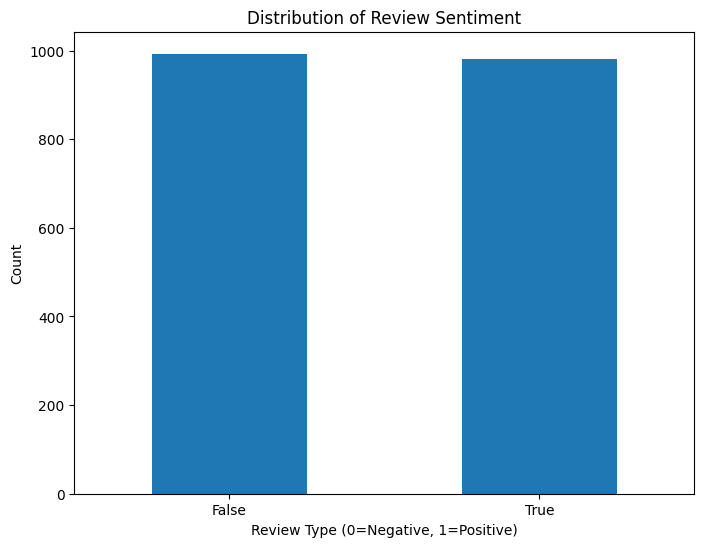

In [5]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
df['Positive Review'].value_counts().plot(kind='bar')
plt.title('Distribution of Review Sentiment')
plt.xlabel('Review Type (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [6]:
# Set the targeted label and features
y = df['Positive Review']
X = df.drop(columns = 'Positive Review')

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (1973, 1)
Labels shape: (1973,)


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. No, I don't have a new feature list.
2. I will use TfidfVectorizer to prepare my data. TfidfVectorizer is a class in scikit-learn that converts a collection of text documents into a matrix of TF-IDF features. It's a crucial tool for natural language processing tasks as it transforms text data into a numerical format that machine learning models can understand.
3. The model that I plan to use is neural network model.
4. I will train multiple neural network architectures using different optimizers with stratified train-validation splits. Training will include early stopping and dropout regularization to prevent overfitting. Model improvement will involve hyperparameter tuning, architecture optimization, and text preprocessing refinement. I will also analyze feature importance to ensure the model learns meaningful patterns and achieve target performance of >80% test accuracy with good generalization.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [7]:
# Import required library
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [8]:
# Create Training and Test Data Sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1234)

# Implement TF-IDF Vectorizer to Transform Text
# 1. Create a TfidfVectorizer object 
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train['Review'])

# 3. Using the fitted vectorizer, transform the training data 
X_train_tfidf = tfidf_vectorizer.transform(X_train['Review'])

# 4. Using the fitted vectorizer, transform the test data 
X_test_tfidf = tfidf_vectorizer.transform(X_test['Review'])

# specify the input_shape, which is the dimensionality of the input layer, in our case is our vocabulary size
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

18558


In [9]:
# Define Model Structure
# 1. Create model object
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,), name='input')
nn_model.add(input_layer)

# 3. Create the first hidden layer and add it to the model object:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu', name='hl_1')
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(0.25))

# 4. Create the second layer and add it to the model object:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu', name='hl_2')
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(0.25))

# 5. Create the third layer and add it to the model object:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu', name='hl_3')
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(0.25))

# 6. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=1, activation='sigmoid', name='output') 
nn_model.add(output_layer)

# Print summary of neural network model structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hl_1 (Dense)                 (None, 64)                1187776   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
hl_2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
hl_3 (Dense)                 (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 1

In [10]:
# Define the Optimization Function
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

# Define the Loss Function
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

# Compile the Model
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

# Fit the Model on the Training Data
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [11]:
t0 = time.time() # start time

num_epochs =  55 # epochs

history = nn_model.fit(
    X_train_tfidf.toarray(), 
    y_train, 
    epochs=num_epochs, 
    verbose=0,
    validation_split=0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])# YOUR CODE HERE 

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 55], Loss: 0.6917, Accuracy: 0.5342, Val_loss: 0.6907, Val_accuracy: 0.5101
Epoch [10/ 55], Loss: 0.6688, Accuracy: 0.6179, Val_loss: 0.6663, Val_accuracy: 0.7770
Epoch [15/ 55], Loss: 0.5906, Accuracy: 0.6881, Val_loss: 0.5708, Val_accuracy: 0.7128
Epoch [20/ 55], Loss: 0.4936, Accuracy: 0.7642, Val_loss: 0.4808, Val_accuracy: 0.7635
Epoch [25/ 55], Loss: 0.3698, Accuracy: 0.8512, Val_loss: 0.4158, Val_accuracy: 0.8345
Epoch [30/ 55], Loss: 0.3360, Accuracy: 0.8850, Val_loss: 0.6202, Val_accuracy: 0.6858
Epoch [35/ 55], Loss: 0.0744, Accuracy: 0.9882, Val_loss: 0.5472, Val_accuracy: 0.7973
Epoch [40/ 55], Loss: 0.1542, Accuracy: 0.9679, Val_loss: 0.5468, Val_accuracy: 0.7466
Epoch [45/ 55], Loss: 0.0546, Accuracy: 0.9924, Val_loss: 0.4374, Val_accuracy: 0.8142
Epoch [50/ 55], Loss: 0.1379, Accuracy: 0.9670, Val_loss: 0.4232, Val_accuracy: 0.8176
Epoch [55/ 55], Loss: 0.0223, Accuracy: 0.9966, Val_loss: 0.6485, Val_accuracy: 0.7770
Elapsed time: 5.27s


In [12]:
# Save the results to the variable history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Add Keras Dropout layers after one or all hidden layers. (num_epochs = 20 and result was cleared.)**
# Before:
# Epoch [5/ 20], Loss: 0.6814, Accuracy: 0.6069, Val_loss: 0.6861, Val_accuracy: 0.5101
# Epoch [10/ 20], Loss: 0.5933, Accuracy: 0.7718, Val_loss: 0.6061, Val_accuracy: 0.7196
# Epoch [15/ 20], Loss: 0.5035, Accuracy: 0.7430, Val_loss: 0.7437, Val_accuracy: 0.5541
# Epoch [20/ 20], Loss: 0.2573, Accuracy: 0.9222, Val_loss: 0.5022, Val_accuracy: 0.7568

# After:
# Epoch [5/ 25], Loss: 0.6918, Accuracy: 0.5182, Val_loss: 0.6914, Val_accuracy: 0.5101
# Epoch [10/ 25], Loss: 0.6803, Accuracy: 0.5883, Val_loss: 0.6788, Val_accuracy: 0.7466
# Epoch [15/ 25], Loss: 0.5838, Accuracy: 0.7270, Val_loss: 0.5825, Val_accuracy: 0.7905
# Epoch [20/ 25], Loss: 0.4457, Accuracy: 0.8123, Val_loss: 0.9599, Val_accuracy: 0.5236
# Epoch [25/ 25], Loss: 0.4227, Accuracy: 0.8166, Val_loss: 0.8637, Val_accuracy: 0.5642
# Elapsed time: 2.79s

# Conclusion:
# By applying keras.Dropout, we randomly drop 25% of neurons in each hidden layer during each training batch, 
# so that it prevents any single neuron from becoming overly specialized, which reduces overfitting. 
# In terms of accuracy, it did not help with the training accuracy since we randomly dropped 25% of neuron. However, it does help increase the validation accuracy since this approach helps reduce overfitting.

In [ ]:
# Evaluate the Model's Performance
# 1. num_epochs

# *** num_epochs = 20: ***
# Epoch [5/ 20], Loss: 0.6932, Accuracy: 0.5106, Val_loss: 0.6924, Val_accuracy: 0.5101
# Epoch [10/ 20], Loss: 0.6881, Accuracy: 0.5351, Val_loss: 0.6868, Val_accuracy: 0.5439
# Epoch [15/ 20], Loss: 0.6546, Accuracy: 0.6534, Val_loss: 0.6577, Val_accuracy: 0.7027
# Epoch [20/ 20], Loss: 0.5779, Accuracy: 0.7151, Val_loss: 0.5408, Val_accuracy: 0.7838
# Elapsed time: 2.42s

# *** num_epochs = 25: ***
# Epoch [5/ 25], Loss: 0.6893, Accuracy: 0.5309, Val_loss: 0.6863, Val_accuracy: 0.5709
# Epoch [10/ 25], Loss: 0.6318, Accuracy: 0.6855, Val_loss: 0.6349, Val_accuracy: 0.7669
# Epoch [15/ 25], Loss: 0.5467, Accuracy: 0.7287, Val_loss: 0.5168, Val_accuracy: 0.7838
# Epoch [20/ 25], Loss: 0.4540, Accuracy: 0.7937, Val_loss: 0.4858, Val_accuracy: 0.8007
# Epoch [25/ 25], Loss: 0.3805, Accuracy: 0.8478, Val_loss: 1.1744, Val_accuracy: 0.5507
# Elapsed time: 2.80s

# *** num_epochs = 30: ***
# Epoch [5/ 30], Loss: 0.6896, Accuracy: 0.5596, Val_loss: 0.6899, Val_accuracy: 0.5101
# Epoch [10/ 30], Loss: 0.6576, Accuracy: 0.6500, Val_loss: 0.6597, Val_accuracy: 0.7162
# Epoch [15/ 30], Loss: 0.5300, Accuracy: 0.7557, Val_loss: 0.5773, Val_accuracy: 0.6486
# Epoch [20/ 30], Loss: 0.4662, Accuracy: 0.8005, Val_loss: 0.4975, Val_accuracy: 0.7736
# Epoch [25/ 30], Loss: 0.3441, Accuracy: 0.8732, Val_loss: 0.5022, Val_accuracy: 0.7500
# Epoch [30/ 30], Loss: 0.2970, Accuracy: 0.8901, Val_loss: 0.8380, Val_accuracy: 0.6588
# Elapsed time: 3.20s

# *** num_epochs = 35: ***
# Epoch [5/ 35], Loss: 0.6907, Accuracy: 0.5266, Val_loss: 0.6894, Val_accuracy: 0.5101
# Epoch [10/ 35], Loss: 0.6441, Accuracy: 0.6695, Val_loss: 0.6433, Val_accuracy: 0.7905
# Epoch [15/ 35], Loss: 0.5173, Accuracy: 0.7549, Val_loss: 0.6915, Val_accuracy: 0.5608
# Epoch [20/ 35], Loss: 0.4744, Accuracy: 0.8005, Val_loss: 0.6004, Val_accuracy: 0.6824
# Epoch [25/ 35], Loss: 0.2977, Accuracy: 0.8943, Val_loss: 0.5524, Val_accuracy: 0.7162
# Epoch [30/ 35], Loss: 0.2618, Accuracy: 0.9197, Val_loss: 0.4178, Val_accuracy: 0.8209
# Epoch [35/ 35], Loss: 0.2069, Accuracy: 0.9527, Val_loss: 0.4831, Val_accuracy: 0.8007
# Elapsed time: 3.62s

# *** num_epochs = 40: ***
# Epoch [5/ 40], Loss: 0.6926, Accuracy: 0.5089, Val_loss: 0.6925, Val_accuracy: 0.5101
# Epoch [10/ 40], Loss: 0.6764, Accuracy: 0.6061, Val_loss: 0.6804, Val_accuracy: 0.5169
# Epoch [15/ 40], Loss: 0.5940, Accuracy: 0.6965, Val_loss: 0.5866, Val_accuracy: 0.7872
# Epoch [20/ 40], Loss: 0.5091, Accuracy: 0.7642, Val_loss: 0.4854, Val_accuracy: 0.7939
# Epoch [25/ 40], Loss: 0.3810, Accuracy: 0.8580, Val_loss: 0.5071, Val_accuracy: 0.7601
# Epoch [30/ 40], Loss: 0.2570, Accuracy: 0.9205, Val_loss: 0.5888, Val_accuracy: 0.7534
# Epoch [35/ 40], Loss: 0.3223, Accuracy: 0.9011, Val_loss: 0.4126, Val_accuracy: 0.8209
# Epoch [40/ 40], Loss: 0.1454, Accuracy: 0.9628, Val_loss: 0.4364, Val_accuracy: 0.8074
# Elapsed time: 4.02s

# *** num_epochs = 55: ***
# Epoch [5/ 55], Loss: 0.6912, Accuracy: 0.5571, Val_loss: 0.6934, Val_accuracy: 0.5101
# Epoch [10/ 55], Loss: 0.6862, Accuracy: 0.5604, Val_loss: 0.6870, Val_accuracy: 0.5101
# Epoch [15/ 55], Loss: 0.6435, Accuracy: 0.7008, Val_loss: 0.6529, Val_accuracy: 0.7399
# Epoch [20/ 55], Loss: 0.5748, Accuracy: 0.6991, Val_loss: 0.5453, Val_accuracy: 0.7838
# Epoch [25/ 55], Loss: 0.3759, Accuracy: 0.8512, Val_loss: 0.4284, Val_accuracy: 0.8176
# Epoch [30/ 55], Loss: 0.2925, Accuracy: 0.8850, Val_loss: 0.9549, Val_accuracy: 0.6047
# Epoch [35/ 55], Loss: 0.3440, Accuracy: 0.8926, Val_loss: 0.3959, Val_accuracy: 0.7973
# Epoch [40/ 55], Loss: 0.1378, Accuracy: 0.9713, Val_loss: 0.6445, Val_accuracy: 0.7466
# Epoch [45/ 55], Loss: 0.0286, Accuracy: 0.9975, Val_loss: 0.4756, Val_accuracy: 0.8176
# Epoch [50/ 55], Loss: 0.0176, Accuracy: 0.9983, Val_loss: 0.5523, Val_accuracy: 0.8243
# Epoch [55/ 55], Loss: 0.0390, Accuracy: 0.9983, Val_loss: 0.4823, Val_accuracy: 0.8007
# Elapsed time: 5.27s

# *** num_epochs = 100: ***
# Epoch [5/ 100], Loss: 0.6917, Accuracy: 0.5325, Val_loss: 0.6916, Val_accuracy: 0.6182
# Epoch [10/ 100], Loss: 0.6795, Accuracy: 0.6103, Val_loss: 0.6816, Val_accuracy: 0.6419
# Epoch [15/ 100], Loss: 0.5949, Accuracy: 0.7625, Val_loss: 0.6783, Val_accuracy: 0.5169
# Epoch [20/ 100], Loss: 0.5015, Accuracy: 0.7287, Val_loss: 0.8734, Val_accuracy: 0.5236
# Epoch [25/ 100], Loss: 0.4156, Accuracy: 0.8259, Val_loss: 0.4705, Val_accuracy: 0.7736
# Epoch [30/ 100], Loss: 0.1801, Accuracy: 0.9425, Val_loss: 0.5839, Val_accuracy: 0.7432
# Epoch [35/ 100], Loss: 0.0146, Accuracy: 1.0000, Val_loss: 0.4219, Val_accuracy: 0.8108
# Epoch [40/ 100], Loss: 0.0051, Accuracy: 1.0000, Val_loss: 0.4514, Val_accuracy: 0.8142
# Epoch [45/ 100], Loss: 0.0028, Accuracy: 1.0000, Val_loss: 0.4723, Val_accuracy: 0.8176
# Epoch [50/ 100], Loss: 0.0019, Accuracy: 1.0000, Val_loss: 0.4871, Val_accuracy: 0.8074
# Epoch [55/ 100], Loss: 0.0014, Accuracy: 1.0000, Val_loss: 0.4998, Val_accuracy: 0.8074
# Epoch [60/ 100], Loss: 0.0011, Accuracy: 1.0000, Val_loss: 0.5104, Val_accuracy: 0.8041
# Epoch [65/ 100], Loss: 0.0008, Accuracy: 1.0000, Val_loss: 0.5205, Val_accuracy: 0.8176
# Epoch [70/ 100], Loss: 0.0007, Accuracy: 1.0000, Val_loss: 0.5275, Val_accuracy: 0.8074
# Epoch [75/ 100], Loss: 0.0006, Accuracy: 1.0000, Val_loss: 0.5350, Val_accuracy: 0.8176
# Epoch [80/ 100], Loss: 0.0005, Accuracy: 1.0000, Val_loss: 0.5410, Val_accuracy: 0.8108
# Epoch [85/ 100], Loss: 0.0005, Accuracy: 1.0000, Val_loss: 0.5481, Val_accuracy: 0.8176
# Epoch [90/ 100], Loss: 0.0004, Accuracy: 1.0000, Val_loss: 0.5521, Val_accuracy: 0.8176
# Epoch [95/ 100], Loss: 0.0004, Accuracy: 1.0000, Val_loss: 0.5560, Val_accuracy: 0.8041
# Epoch [100/ 100], Loss: 0.0003, Accuracy: 1.0000, Val_loss: 0.5604, Val_accuracy: 0.8074
# Elapsed time: 8.62s

# *** num_epochs = 200: ***
# Epoch [5/ 200], Loss: 0.6911, Accuracy: 0.5368, Val_loss: 0.6909, Val_accuracy: 0.5169
# Epoch [10/ 200], Loss: 0.6771, Accuracy: 0.6788, Val_loss: 0.6818, Val_accuracy: 0.5101
# Epoch [15/ 200], Loss: 0.5772, Accuracy: 0.7405, Val_loss: 0.5873, Val_accuracy: 0.7905
# Epoch [20/ 200], Loss: 0.5252, Accuracy: 0.7422, Val_loss: 0.4819, Val_accuracy: 0.7872
# Epoch [25/ 200], Loss: 0.3285, Accuracy: 0.8740, Val_loss: 0.5830, Val_accuracy: 0.6959
# Epoch [30/ 200], Loss: 0.0818, Accuracy: 0.9890, Val_loss: 0.5321, Val_accuracy: 0.7770
# Epoch [35/ 200], Loss: 0.0122, Accuracy: 1.0000, Val_loss: 0.4574, Val_accuracy: 0.8176
# Epoch [40/ 200], Loss: 0.0046, Accuracy: 1.0000, Val_loss: 0.4663, Val_accuracy: 0.8142
# Epoch [45/ 200], Loss: 0.0027, Accuracy: 1.0000, Val_loss: 0.4883, Val_accuracy: 0.8209
# Epoch [50/ 200], Loss: 0.0018, Accuracy: 1.0000, Val_loss: 0.5058, Val_accuracy: 0.8243
# Epoch [55/ 200], Loss: 0.0013, Accuracy: 1.0000, Val_loss: 0.5166, Val_accuracy: 0.8209
# Epoch [60/ 200], Loss: 0.0010, Accuracy: 1.0000, Val_loss: 0.5269, Val_accuracy: 0.8176
# Epoch [65/ 200], Loss: 0.0008, Accuracy: 1.0000, Val_loss: 0.5366, Val_accuracy: 0.8209
# Epoch [70/ 200], Loss: 0.0007, Accuracy: 1.0000, Val_loss: 0.5434, Val_accuracy: 0.8176
# Epoch [75/ 200], Loss: 0.0006, Accuracy: 1.0000, Val_loss: 0.5514, Val_accuracy: 0.8209
# Epoch [80/ 200], Loss: 0.0005, Accuracy: 1.0000, Val_loss: 0.5570, Val_accuracy: 0.8176
# Epoch [85/ 200], Loss: 0.0005, Accuracy: 1.0000, Val_loss: 0.5634, Val_accuracy: 0.8209
# Epoch [90/ 200], Loss: 0.0004, Accuracy: 1.0000, Val_loss: 0.5679, Val_accuracy: 0.8209
# Epoch [95/ 200], Loss: 0.0004, Accuracy: 1.0000, Val_loss: 0.5727, Val_accuracy: 0.8209
# Epoch [100/ 200], Loss: 0.0003, Accuracy: 1.0000, Val_loss: 0.5778, Val_accuracy: 0.8176
# Epoch [105/ 200], Loss: 0.0003, Accuracy: 1.0000, Val_loss: 0.5817, Val_accuracy: 0.8176
# Epoch [110/ 200], Loss: 0.0003, Accuracy: 1.0000, Val_loss: 0.5853, Val_accuracy: 0.8176
# Epoch [115/ 200], Loss: 0.0003, Accuracy: 1.0000, Val_loss: 0.5893, Val_accuracy: 0.8176
# Epoch [120/ 200], Loss: 0.0002, Accuracy: 1.0000, Val_loss: 0.5926, Val_accuracy: 0.8176
# Epoch [125/ 200], Loss: 0.0002, Accuracy: 1.0000, Val_loss: 0.5961, Val_accuracy: 0.8176
# Epoch [130/ 200], Loss: 0.0002, Accuracy: 1.0000, Val_loss: 0.5985, Val_accuracy: 0.8209
# Epoch [135/ 200], Loss: 0.0002, Accuracy: 1.0000, Val_loss: 0.6018, Val_accuracy: 0.8176
# Epoch [140/ 200], Loss: 0.0002, Accuracy: 1.0000, Val_loss: 0.6046, Val_accuracy: 0.8176
# Epoch [145/ 200], Loss: 0.0002, Accuracy: 1.0000, Val_loss: 0.6072, Val_accuracy: 0.8176
# Epoch [150/ 200], Loss: 0.0002, Accuracy: 1.0000, Val_loss: 0.6099, Val_accuracy: 0.8176
# Epoch [155/ 200], Loss: 0.0002, Accuracy: 1.0000, Val_loss: 0.6120, Val_accuracy: 0.8176
# Epoch [160/ 200], Loss: 0.0002, Accuracy: 1.0000, Val_loss: 0.6144, Val_accuracy: 0.8176
# Epoch [165/ 200], Loss: 0.0001, Accuracy: 1.0000, Val_loss: 0.6169, Val_accuracy: 0.8176
# Epoch [170/ 200], Loss: 0.0001, Accuracy: 1.0000, Val_loss: 0.6189, Val_accuracy: 0.8176
# Epoch [175/ 200], Loss: 0.0001, Accuracy: 1.0000, Val_loss: 0.6210, Val_accuracy: 0.8176
# Epoch [180/ 200], Loss: 0.0001, Accuracy: 1.0000, Val_loss: 0.6230, Val_accuracy: 0.8176
# Epoch [185/ 200], Loss: 0.0001, Accuracy: 1.0000, Val_loss: 0.6248, Val_accuracy: 0.8209
# Epoch [190/ 200], Loss: 0.0001, Accuracy: 1.0000, Val_loss: 0.6268, Val_accuracy: 0.8209
# Epoch [195/ 200], Loss: 0.0001, Accuracy: 1.0000, Val_loss: 0.6287, Val_accuracy: 0.8209
# Epoch [200/ 200], Loss: 0.0001, Accuracy: 1.0000, Val_loss: 0.6306, Val_accuracy: 0.8176
# Elapsed time: 16.58s

# Conclusion:
# When num_epochs = 55, the model shows a consistent good performance

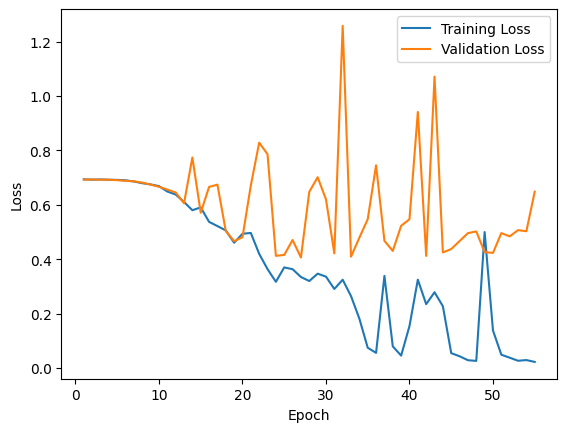

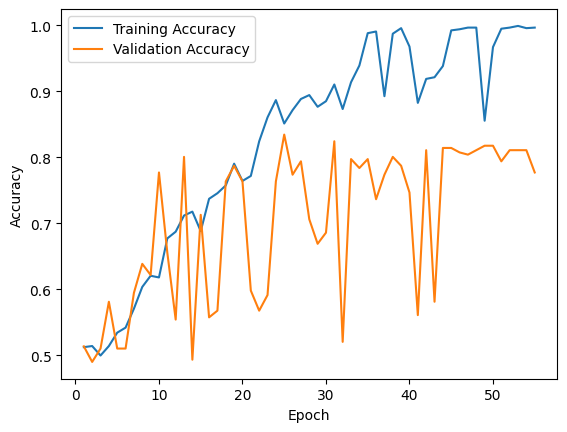

In [13]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Evaluate the Performance on the Test Set
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(),y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.7976
Loss:  0.6609449982643127 Accuracy:  0.7975708246231079


In [15]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 20 examples:")
for i in range(0,20):
    print("Example " + str(i+1) + ": " + str(probability_predictions[i])  + ", " + str(y_test.to_numpy()[i]))

Predictions for the first 20 examples:
Example 1: [0.9870976], False
Example 2: [0.860291], True
Example 3: [0.02971289], True
Example 4: [0.01495162], False
Example 5: [0.9355432], True
Example 6: [0.6459062], False
Example 7: [0.00277886], False
Example 8: [0.00025502], True
Example 9: [0.9962578], True
Example 10: [0.99509156], True
Example 11: [0.9343263], True
Example 12: [0.13784602], False
Example 13: [0.98717326], True
Example 14: [0.9953986], True
Example 15: [0.8847685], False
Example 16: [0.9131421], True
Example 17: [0.00027892], False
Example 18: [0.6498153], True
Example 19: [0.30731636], True
Example 20: [0.00389564], False
